<a href="https://colab.research.google.com/github/owenburton/DS-Unit-1-Sprint-3-Statistical-Tests-and-Experiments/blob/master/module3-introduction-to-bayesian-inference/LS_DS_133_Introduction_to_Bayesian_Inference_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lambda School Data Science Module 133

## Introduction to Bayesian Inference




## Assignment - Code it up!

Most of the above was pure math - now write Python code to reproduce the results! This is purposefully open ended - you'll have to think about how you should represent probabilities and events. You can and should look things up, and as a stretch goal - refactor your code into helpful reusable functions!

Specific goals/targets:

1. Write a function `def prob_drunk_given_positive(prob_drunk_prior, prob_positive, prob_positive_drunk)` that reproduces the example from lecture, and use it to calculate and visualize a range of situations
2. Explore `scipy.stats.bayes_mvs` - read its documentation, and experiment with it on data you've tested in other ways earlier this week
3. Create a visualization comparing the results of a Bayesian approach to a traditional/frequentist approach
4. In your own words, summarize the difference between Bayesian and Frequentist statistics

If you're unsure where to start, check out [this blog post of Bayes theorem with Python](https://dataconomy.com/2015/02/introduction-to-bayes-theorem-with-python/) - you could and should create something similar!

Stretch goals:

- Apply a Bayesian technique to a problem you previously worked (in an assignment or project work) on from a frequentist (standard) perspective
- Check out [PyMC3](https://docs.pymc.io/) (note this goes beyond hypothesis tests into modeling) - read the guides and work through some examples
- Take PyMC3 further - see if you can build something with it!

## 1) Write a function def prob_drunk_given_positive(prob_drunk_prior, prob_positive, prob_positive_drunk) that reproduces the example from lecture, and use it to calculate and visualize a range of situations

In [3]:
# I changed the function name and parameters.
def prob_drunk(prior, test_accuracy):
  prob_false_positive = 1 - test_accuracy
  prob_false_prior = 1 - prior
  prob = (test_accuracy*prior) / ((test_accuracy*prior)+(prob_false_positive*prob_false_prior))
  return prob

test_accy = .99
new_prior1 = prob_drunk(.332, test_accy)
new_prior2 = prob_drunk(new_prior1, test_accy)
new_prior3 = prob_drunk(new_prior2, test_accy)
new_prior4 = prob_drunk(new_prior3, test_accy)
new_prior5 = prob_drunk(new_prior4, test_accy)
new_prior6 = prob_drunk(new_prior5, test_accy)
new_prior7 = prob_drunk(new_prior6, test_accy)
new_prior8 = prob_drunk(new_prior7, test_accy)
new_prior9 = prob_drunk(new_prior8, test_accy)
new_prior10 = prob_drunk(new_prior9, test_accy)
new_prior11 = prob_drunk(new_prior10, test_accy)
new_prior12 = prob_drunk(new_prior11, test_accy)
new_prior13 = prob_drunk(new_prior12, test_accy)

print(new_prior7)


0.9999999999999785


## 3) Create a visualization comparing the results of a Bayesian approach to a traditional/frequentist approach.

In [0]:
from scipy import stats

freq_drunk_test_data = [0, .99, .99, .99, .99, .99, .99, .99, .99, .99]

bayes_drunk_test_data = [0, .332, new_prior1, new_prior2, new_prior3, new_prior4, new_prior5,
                         new_prior6, new_prior7, new_prior8]

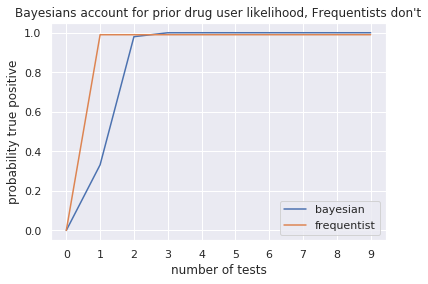

In [30]:
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt

ax = sns.lineplot(x=range(0,10), y=bayes_drunk_test_data, label='bayesian')
ax1 = sns.lineplot(x=range(0,10), y=freq_drunk_test_data, label='frequentist')

ax.set(xlabel='number of tests', ylabel='probability true positive')
ax.set_title("Bayesians account for prior drug user likelihood, Frequentists don't")

ax.set_xticks(range(0,10))

plt.legend()
plt.show()

## 4) In your own words, summarize the difference between Bayesian and Frequentist statistics.

Bayesian statistics takes into account probabilities from new statistically relevant sources as well as prior probabilities, while Frequentist statistics only accounts for the latest relevant information.

## Resources

- [Worked example of Bayes rule calculation](https://en.wikipedia.org/wiki/Bayes'_theorem#Examples) (helpful as it fully breaks out the denominator)
- [Source code for mvsdist in scipy](https://github.com/scipy/scipy/blob/90534919e139d2a81c24bf08341734ff41a3db12/scipy/stats/morestats.py#L139)